In [2]:
#Building a naive spam classifier using machine learning
#import the modules, libraries which shallbe required
import os, sys
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [3]:
# update fonts
FONTSIZE = 32
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 28}

mp.rc('font', **font)

In [4]:
#import data
spambase = pd.read_csv('../datasets/spambase_data.csv')
names= spambase.keys().tolist() #get attribute names 
inputs = names[:-1]
print inputs
spambase[0:10]

['word_freq_make         .', 'word_freq_address      .', 'word_freq_all          .', 'word_freq_3d           .', 'word_freq_our          .', 'word_freq_over         .', 'word_freq_remove       .', 'word_freq_internet     .', 'word_freq_order        .', 'word_freq_mail         .', 'word_freq_receive      .', 'word_freq_will         .', 'word_freq_people       .', 'word_freq_report       .', 'word_freq_addresses    .', 'word_freq_free         .', 'word_freq_business     .', 'word_freq_email        .', 'word_freq_you          .', 'word_freq_credit       .', 'word_freq_your         .', 'word_freq_font         .', 'word_freq_000          .', 'word_freq_money        .', 'word_freq_hp           .', 'word_freq_hpl          .', 'word_freq_george       .', 'word_freq_650          .', 'word_freq_lab          .', 'word_freq_labs         .', 'word_freq_telnet       .', 'word_freq_857          .', 'word_freq_data         .', 'word_freq_415          .', 'word_freq_85           .', 'word_freq_technolo

,word_freq_make .,word_freq_address .,word_freq_all .,word_freq_3d .,word_freq_our .,word_freq_over .,word_freq_remove .,word_freq_internet .,word_freq_order .,word_freq_mail .,...,char_freq_; .,char_freq_( .,char_freq_[ .,char_freq_! .,char_freq_$ .,char_freq_# .,capital_run_length_average .,capital_run_length_longest .,capital_run_length_total .,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [5]:
test_fraction = 0.20 #train and test data splitting
train_data, test_data = train_test_split(spambase, test_size=test_fraction)
print train_data.shape, test_data.shape

(3680, 58) (921, 58)


In [6]:
#standardising the data by scaler transforms 
def standardize_data(train_data, test_data, names):
    scaler  = StandardScaler()
    scaler.fit(train_data[names])
    
    X_train = scaler.transform(train_data[names])
    y_train = train_data['spam_class']
    
    X_test  = scaler.transform(test_data[names])
    y_test  = test_data['spam_class']
    return (X_train, X_test, y_train, y_test, scaler)

In [7]:
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, inputs)
X_train[0:5]

array([[-0.34788564, -0.16495548, -0.56983942, -0.04237459, -0.47040262,
        -0.35299601, -0.29573457, -0.28007345, -0.32631635, -0.36924278,
        -0.30379263, -0.63464277, -0.30821416, -0.19122989, -0.1910809 ,
        -0.29137942, -0.32534935, -0.34667593, -0.94809225, -0.18903777,
        -0.69213021, -0.11681369, -0.2911788 , -0.22745339, -0.32982867,
        -0.29450889,  5.93603174, -0.23338071, -0.16565283, -0.22541497,
        -0.15630003, -0.14319099, -0.16969276, -0.14585816, -0.22800082,
        -0.24140183, -0.32706463, -0.06119975, -0.17791778, -0.1862457 ,
        -0.12132329, -0.17258463, -0.21007286, -0.12538052, -0.29601828,
        -0.21310768, -0.07194742, -0.11688439, -0.16903888, -0.48953547,
        -0.15488842, -0.31843657, -0.33584121, -0.16491657, -0.13871544,
        -0.25207577, -0.45501327],
       [-0.34788564, -0.16495548, -0.56983942, -0.04237459,  4.44129825,
        -0.35299601, -0.29573457, -0.28007345, -0.32631635, -0.36924278,
        -0.30379

In [8]:
#the regressor to be used for learning
dnn = MLPClassifier(hidden_layer_sizes=(10,10), 
              activation='relu', 
              solver='adam', alpha=0.0005, batch_size='auto', learning_rate='constant', 
              learning_rate_init=0.005, power_t=0.5, max_iter=100, shuffle=True, 
              random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
              nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
              beta_2=0.999, epsilon=1e-08)

In [9]:
#the training and fitting of curve
print "*** TRAINING ***"
dnn.fit(X_train, y_train)

print("Training set score: %f" % dnn.score(X_train, y_train))      
print("Test set score:     %f" % dnn.score(X_test,  y_test))

filename = '02_dnn_spambase.pkl'
print "save to %s" % filename
joblib.dump(dnn, filename)

*** TRAINING ***
Training set score: 0.976359
Test set score:     0.932682
save to 02_dnn_spambase.pkl


['02_dnn_spambase.pkl']

In [10]:
#plotting the loss
def plotLoss(dnn, ftsize=FONTSIZE):
    y    = dnn.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.8*min(y)
    ymax = 1.2*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('02_dnn_wine_loss.png')
    plt.show()

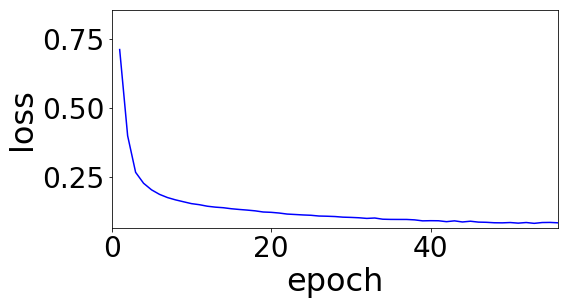

In [11]:
plotLoss(dnn)

In [12]:
def plotResults(dnn, X_test, y_test, xmin=-1, xmax=2, ymin=-1, ymax=2, ftsize=FONTSIZE):
    
    p = dnn.predict(X_test)
    # set size of figure
    plt.figure(figsize=(8,8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'spam class', fontsize=ftsize)
    plt.ylabel(r'predicted spam class', fontsize=ftsize)
    
    # choose color of points
    blue= (0,0,1)
    plt.scatter(y_test, p, marker='o', s=50, c=blue, alpha=0.2)    
    plt.savefig('02_dnn_spambase_results.png')
    plt.show()
   

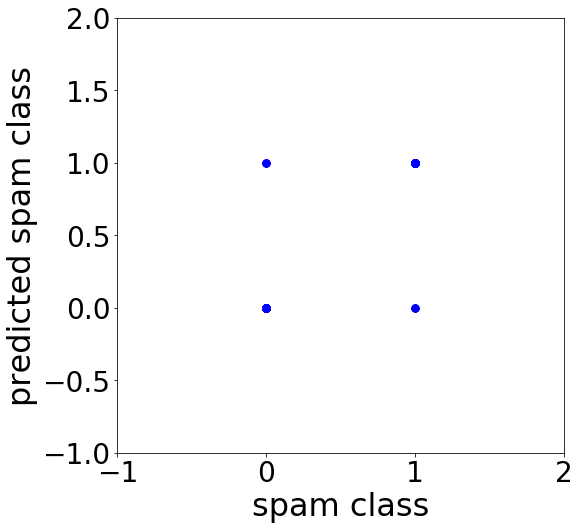

In [13]:
plotResults(dnn, X_test, y_test)